In [0]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR, SVR

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt

In [0]:
X = np.load("suspended_robot_X_data.npy",allow_pickle=True)
Y = np.load("suspended_robot_Y_data.npy",allow_pickle=True)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle=True)

In [4]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((77414, 6), (33178, 6), (77414, 4), (33178, 4))

In [0]:
def plot_error(y_true,y_pred):
    error0 = y_true[:,0] - y_pred[:,0]
    error1 = y_true[:,1] - y_pred[:,1]
    error2 = y_true[:,2] - y_pred[:,2]
    error3 = y_true[:,3] - y_pred[:,3]
    fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5),sharex=False,sharey=False)
    ax[0].plot(y_true[:,0],error0,"r+",markersize=1)
    ax[0].set_title("Theta 0 : True Value Vs Error")
    ax[0].set_xlabel("Theta 0 (True Value)")
    ax[0].set_ylabel("Theta 0 (Prediction Error)")
    ax[1].plot(y_true[:,1],error1,"r+",markersize=1)
    ax[1].set_title("Theta 1 : True Value Vs Error")
    ax[1].set_xlabel("Theta 1 (True Value)")
    ax[1].set_ylabel("Theta 1 (Prediction Error)")
    ax[2].plot(y_true[:,2],error2,"r+",markersize=1)
    ax[2].set_title("Theta 2 : True Value Vs Error")
    ax[2].set_xlabel("Theta 2 (True Value)")
    ax[2].set_ylabel("Theta 2 (Prediction Error)")
    ax[3].plot(y_true[:,3],error3,"r+",markersize=1)
    ax[3].set_title("Theta 3 : True Value Vs Error")
    ax[3].set_xlabel("Theta 3 (True Value)")
    ax[3].set_ylabel("Theta 3 (Prediction Error)")
    plt.show()

In [0]:
def plot_error_dist(y_true,y_pred):
    error0 = y_true[:,0] - y_pred[:,0]
    error1 = y_true[:,1] - y_pred[:,1]
    error2 = y_true[:,2] - y_pred[:,2]
    error3 = y_true[:,3] - y_pred[:,3]
    fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5),sharex=False,sharey=False)
    ax[0].hist(error0,bins=100)
    ax[0].set_title("Theta 0 : Error Dist")
    ax[0].set_xlabel("Theta 0")
    ax[1].hist(error1,bins=100)
    ax[1].set_title("Theta 1 : Error Dist")
    ax[1].set_xlabel("Theta 1")
    ax[2].hist(error2,bins=100)
    ax[2].set_title("Theta 2 : Error Dist")
    ax[2].set_xlabel("Theta 2")
    ax[3].hist(error3,bins=100)
    ax[3].set_title("Theta 3 : Error Dist")
    ax[3].set_xlabel("Theta 3")
    plt.show()

<b style="color:blue">Building a linear model (stadard Linear Regression)</b>

In [7]:
linear_model_def = LinearRegression()
multi_linear_model_def = MultiOutputRegressor(estimator=linear_model_def,
                                              n_jobs=-1)
multi_linear_model_def.fit(X_train,Y_train)

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     n_jobs=-1)

In [0]:
Y_train_pred = multi_linear_model_def.predict(X_train)
Y_test_pred = multi_linear_model_def.predict(X_test)

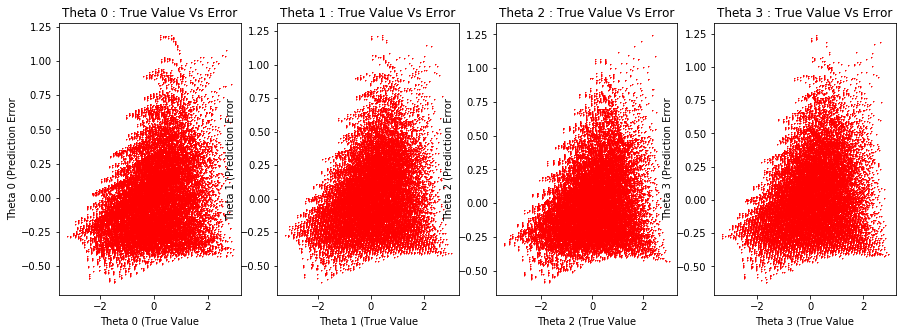

In [14]:
plot_error(Y_test,Y_test_pred)

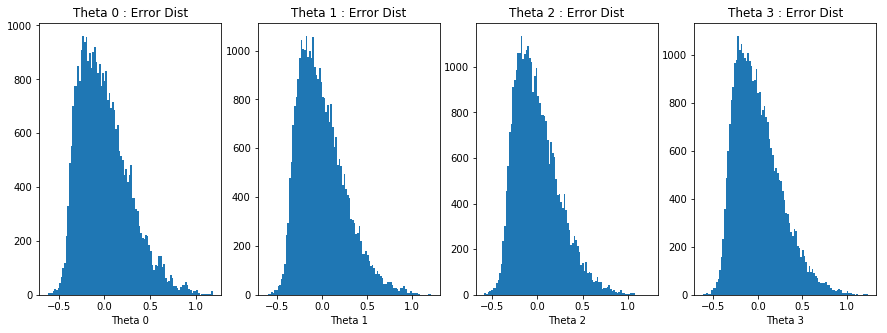

In [17]:
plot_error_dist(Y_test,Y_test_pred)

In [18]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 0.923020
Theta1 : 0.932225
Theta2 : 0.938054
Theta3 : 0.931997


In [19]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.924462
Theta1 : 0.930991
Theta2 : 0.939308
Theta3 : 0.931522


<b style="color:blue">Building a SGDRegressor Model</b>

In [20]:
sgd_reg_model_def = SGDRegressor()
multi_sgd_model_def = MultiOutputRegressor(estimator=sgd_reg_model_def,n_jobs=-1)
multi_sgd_model_def.fit(X_train,Y_train)

MultiOutputRegressor(estimator=SGDRegressor(alpha=0.0001, average=False,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.01, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='invscaling',
                                            loss='squared_loss', max_iter=1000,
                                            n_iter_no_change=5, penalty='l2',
                                            power_t=0.25, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                     n_jobs=-1)

In [0]:
Y_train_pred = multi_sgd_model_def.predict(X_train)
Y_test_pred = multi_sgd_model_def.predict(X_test)

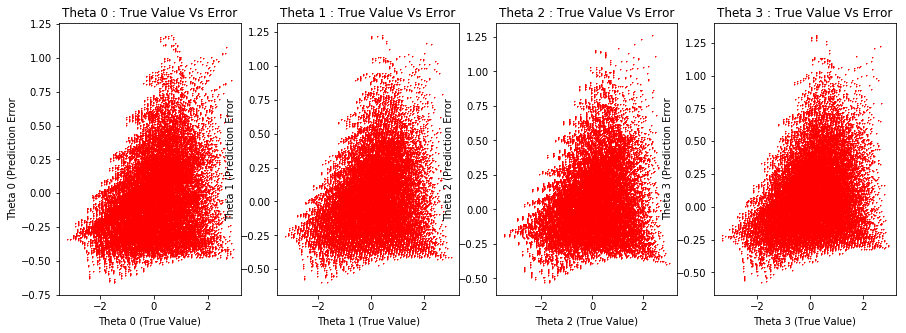

In [22]:
plot_error(Y_test,Y_test_pred)

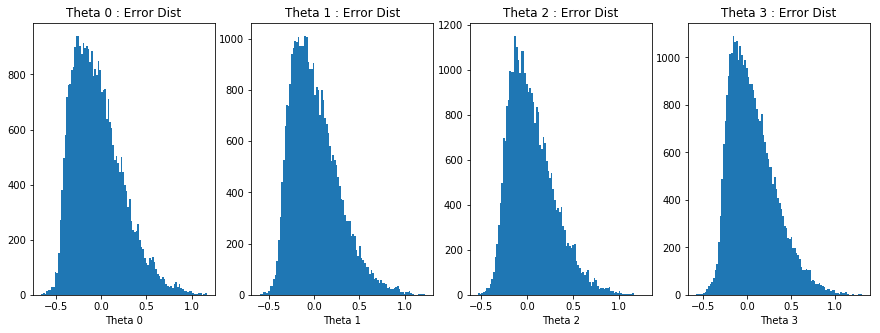

In [23]:
plot_error_dist(Y_test,Y_test_pred)

In [24]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 0.921387
Theta1 : 0.931805
Theta2 : 0.934585
Theta3 : 0.926957


In [25]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.922798
Theta1 : 0.930461
Theta2 : 0.936083
Theta3 : 0.926349


<b style="color:blue">Building a DecisionTree Regressor</b>

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_def = DecisionTreeRegressor()
multi_dt_model_def = MultiOutputRegressor(estimator=dt_def,n_jobs=-1)
multi_dt_model_def.fit(X_train,Y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor(criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best'),
                     n_jobs=-1)

In [0]:
Y_train_pred = multi_dt_model_def.predict(X_train)
Y_test_pred = multi_dt_model_def.predict(X_test)

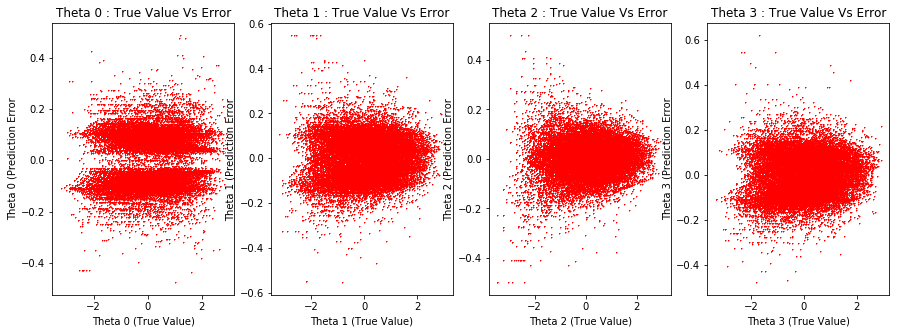

In [29]:
plot_error(Y_test,Y_test_pred)

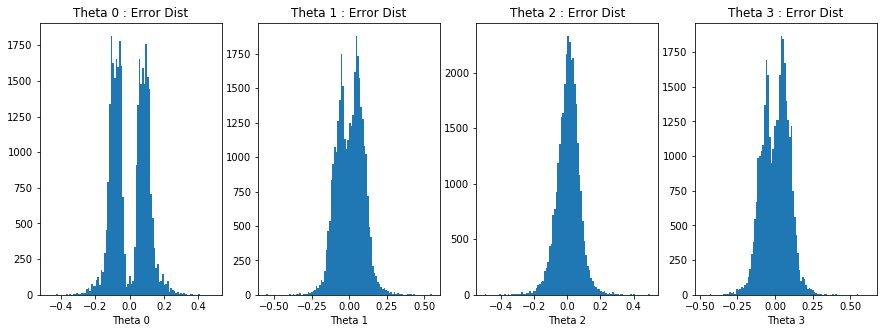

In [30]:
plot_error_dist(Y_test,Y_test_pred)

In [31]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 1.000000
Theta1 : 1.000000
Theta2 : 1.000000
Theta3 : 1.000000


In [32]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.990146
Theta1 : 0.992169
Theta2 : 0.995295
Theta3 : 0.992229


<b style="color:blue">Building a AdaBoost Regression using a standard SGD Regressor</b>

In [0]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
base_dt_model = DecisionTreeRegressor()
ada_def = AdaBoostRegressor(base_estimator=base_dt_model)

multi_ada_model_def = MultiOutputRegressor(estimator=ada_def,n_jobs=-1)
multi_ada_model_def.fit(X_train,Y_train)

KeyboardInterrupt: ignored

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
grad_boost_def = GradientBoostingRegressor(n_estimators=300)

multi_grad_boost_def = MultiOutputRegressor(estimator=grad_boost_def,n_jobs=-1)
multi_grad_boost_def.fit(X_train,Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_est

In [0]:
Y_train_pred = multi_grad_boost_def.predict(X_train)
Y_test_pred = multi_grad_boost_def.predict(X_test)

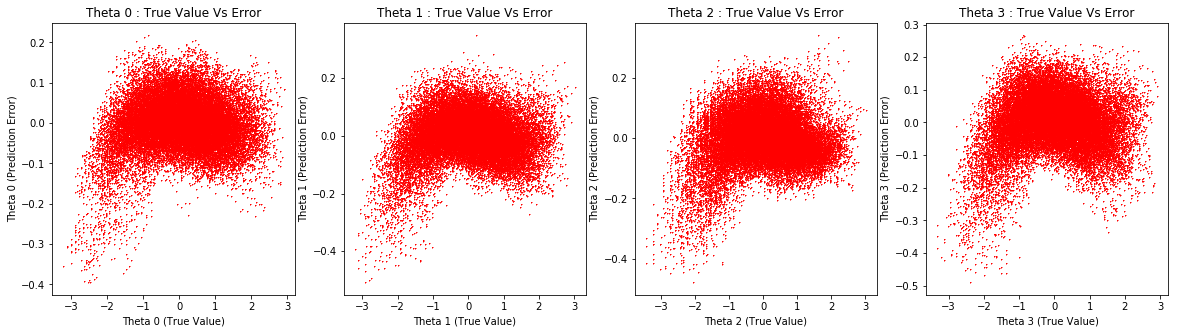

In [53]:
plot_error(Y_test,Y_test_pred)

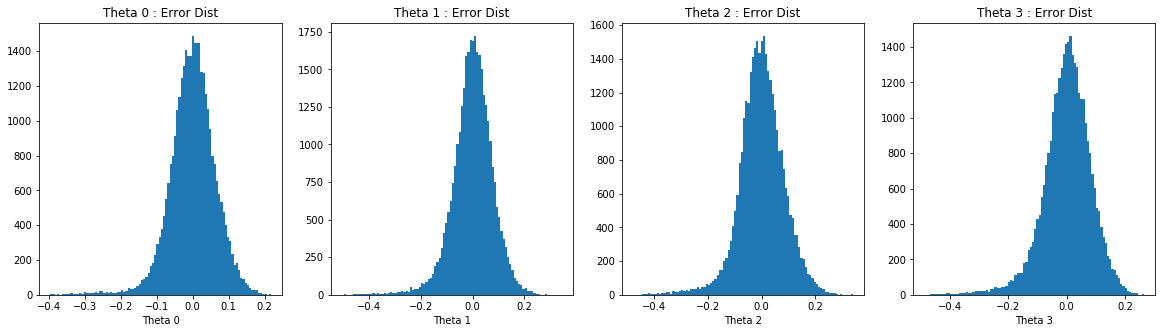

In [55]:
plot_error_dist(Y_test,Y_test_pred)

In [40]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 0.996089
Theta1 : 0.994098
Theta2 : 0.993142
Theta3 : 0.993391


In [41]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.996031
Theta1 : 0.993958
Theta2 : 0.993113
Theta3 : 0.993268


In [0]:
from xgboost import XGBRegressor

In [43]:
xg_boost_def = XGBRegressor()

multi_xg_boost_def = MultiOutputRegressor(estimator=xg_boost_def,n_jobs=-1)
multi_xg_boost_def.fit(X_train,Y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbos

In [0]:
Y_train_pred = multi_xg_boost_def.predict(X_train)
Y_test_pred = multi_xg_boost_def.predict(X_test)

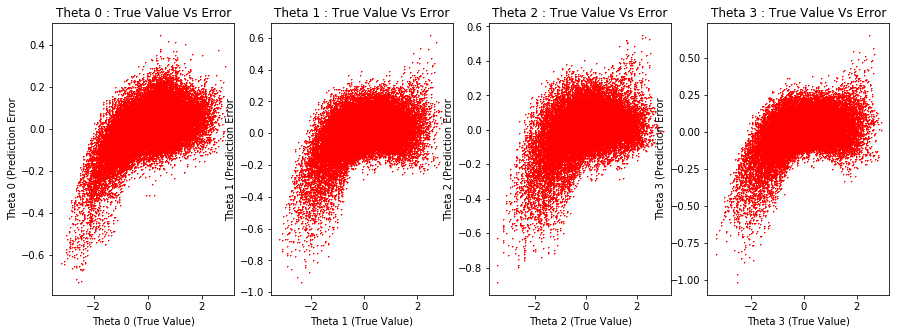

In [45]:
plot_error(Y_test,Y_test_pred)

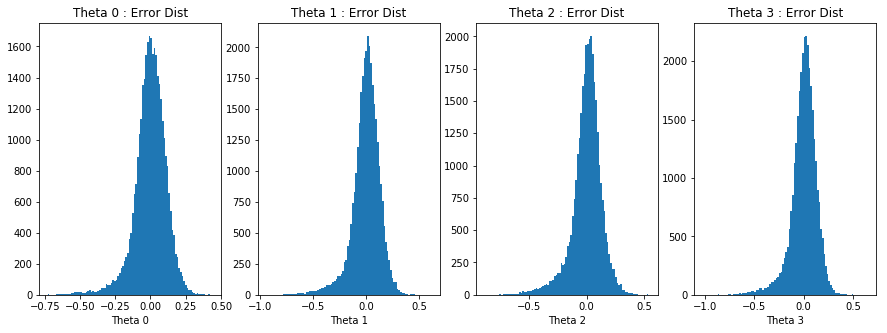

In [46]:
plot_error_dist(Y_test,Y_test_pred)

In [0]:
print("train performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_train[:,0],Y_train_pred[:,0]),
               r2_score(Y_train[:,1],Y_train_pred[:,1]),
               r2_score(Y_train[:,2],Y_train_pred[:,2]),
               r2_score(Y_train[:,3],Y_train_pred[:,3])))

train performance
Theta0 : 0.987638
Theta1 : 0.982911
Theta2 : 0.982773
Theta3 : 0.983056


In [0]:
print("test performance")
print("Theta0 : %f\n\
Theta1 : %f\n\
Theta2 : %f\n\
Theta3 : %f" %(r2_score(Y_test[:,0],Y_test_pred[:,0]),
               r2_score(Y_test[:,1],Y_test_pred[:,1]),
               r2_score(Y_test[:,2],Y_test_pred[:,2]),
               r2_score(Y_test[:,3],Y_test_pred[:,3])))

test performance
Theta0 : 0.987483
Theta1 : 0.982647
Theta2 : 0.982695
Theta3 : 0.982744
